# Introduction to Python for Chemists

This Jupyter notebook demonstrates various Python concepts including:
- Importing modules
- Reading/writing CSV files
- Variables and naming conventions
- Different data types
- Functions
- Loops
- Plotting with matplotlib
- Using RDKit for chemical calculations

The notebook reads a CSV file containing SMILES strings and solubility data,
generates 2D and 3D molecular structures, calculates LogP and molecular weight,
saves the structures as images, creates a new CSV file with calculated properties,
and plots the results.

# Import Libraries 

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from pathlib import Path
from IPython.display import display, HTML, Image as IPImage

# Constants

In [2]:
# Constants
INPUT_CSV = Path("/Users/sam/Documents/Python_teaching/CHEM2025_6025/CHEM2025-fullexample-data.csv")
OUTPUT_CSV = Path("full_example.csv")
IMAGE_DIR = Path("molecule_images")

# Ensure the image directory exists
IMAGE_DIR.mkdir(exist_ok=True)

## Helper Functions

In [3]:
def read_csv_file(file_path: Path) -> pd.DataFrame:
    """Read a CSV file and return a pandas DataFrame."""
    return pd.read_csv(file_path)

def generate_molecule_image(smiles: str, name: str) -> None:
    """Generate and save a 2D molecule image from a SMILES string."""
    mol_2d = Chem.MolFromSmiles(smiles)
    img_2d = Draw.MolToImage(mol_2d)
    img_2d.save(IMAGE_DIR / f"{name}_2D.png")

def calculate_properties(smiles: str) -> dict:
    """Calculate chemical properties for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    properties = {
        'LogP': Descriptors.MolLogP(mol),
        'Molecular Weight': Descriptors.ExactMolWt(mol),
        'Num Carbon Atoms': sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6),
        'Total Atoms': mol.GetNumAtoms(),
        'Bond Count': mol.GetNumBonds()
    }
    
    # Example of using a list: storing property names
    property_names = list(properties.keys())
    
    # Example of using a dictionary: mapping property names to their descriptions
    property_descriptions = {
        'LogP': 'Octanol-Water Partition Coefficient',
        'Molecular Weight': 'Mass of one molecule of the substance',
        'Num Carbon Atoms': 'Number of carbon atoms in the molecule',
        'Total Atoms': 'Total number of atoms in the molecule',
        'Bond Count': 'Number of bonds in the molecule'
    }
    
    # Add descriptions to the properties dictionary
    for name in property_names:
        properties[f'{name} Description'] = property_descriptions[name]
    
    return properties


def plot_molweight_vs_logp(df: pd.DataFrame) -> None:
    """Create and display a scatter plot of Molecular Weight vs LogP."""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['LogP'], df['Molecular Weight'])
    plt.xlabel('LogP')
    plt.ylabel('Molecular Weight')
    plt.title('Molecular Weight vs LogP')
    for _, row in df.iterrows():
        plt.annotate(row['Name'], (row['LogP'], row['Molecular Weight']))
    plt.tight_layout()
    plt.show()


# Main processing 


Original Data:


Name,Number of Carbon Atoms,Molecular Formula,Condensed Structural Formula,Boiling_Point_C,Boiling_Point_K,SMILES
Methane,1,CH₄,CH₄,-162,111.15,C
Ethane,2,C₂H₆,CH₃CH₃,-89,184.15,CC
Propane,3,C₃H₈,CH₃CH₂CH₃,-42,231.15,CCC
Butane,4,C₄H₁₀,CH₃(CH₂)₂CH₃,0,273.15,CCCC
Pentane,5,C₅H₁₂,CH₃(CH₂)₃CH₃,36,309.15,CCCCC
Hexane,6,C₆H₁₄,CH₃(CH₂)₄CH₃,69,342.15,CCCCCC
Heptane,7,C₇H₁₆,CH₃(CH₂)₅CH₃,98,371.15,CCCCCCC
Octane,8,C₈H₁₈,CH₃(CH₂)₆CH₃,126,399.15,CCCCCCCC
Nonane,9,C₉H₂₀,CH₃(CH₂)₇CH₃,151,424.15,CCCCCCCCC
Decane,10,C₁₀H₂₂,CH₃(CH₂)₈CH₃,174,447.15,CCCCCCCCCC



Updated Data with RDKit-generated properties:


Name,Number of Carbon Atoms,Molecular Formula,Condensed Structural Formula,Boiling_Point_C,Boiling_Point_K,SMILES,LogP,Molecular Weight,Num Carbon Atoms,Total Atoms,Bond Count,LogP Description,Molecular Weight Description,Num Carbon Atoms Description,Total Atoms Description,Bond Count Description
Methane,1,CH₄,CH₄,-162,111.15,C,0.6361,16.031300,1,1,0,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Ethane,2,C₂H₆,CH₃CH₃,-89,184.15,CC,1.0262,30.046950,2,2,1,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Propane,3,C₃H₈,CH₃CH₂CH₃,-42,231.15,CCC,1.4163,44.062600,3,3,2,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Butane,4,C₄H₁₀,CH₃(CH₂)₂CH₃,0,273.15,CCCC,1.8064,58.078250,4,4,3,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Pentane,5,C₅H₁₂,CH₃(CH₂)₃CH₃,36,309.15,CCCCC,2.1965,72.093900,5,5,4,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Hexane,6,C₆H₁₄,CH₃(CH₂)₄CH₃,69,342.15,CCCCCC,2.5866,86.109550,6,6,5,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Heptane,7,C₇H₁₆,CH₃(CH₂)₅CH₃,98,371.15,CCCCCCC,2.9767,100.125201,7,7,6,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Octane,8,C₈H₁₈,CH₃(CH₂)₆CH₃,126,399.15,CCCCCCCC,3.3668,114.140851,8,8,7,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Nonane,9,C₉H₂₀,CH₃(CH₂)₇CH₃,151,424.15,CCCCCCCCC,3.7569,128.156501,9,9,8,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule
Decane,10,C₁₀H₂₂,CH₃(CH₂)₈CH₃,174,447.15,CCCCCCCCCC,4.1470,142.172151,10,10,9,Octanol-Water Partition Coefficient,Mass of one molecule of the substance,Number of carbon atoms in the molecule,Total number of atoms in the molecule,Number of bonds in the molecule



Generating Molecule Images:


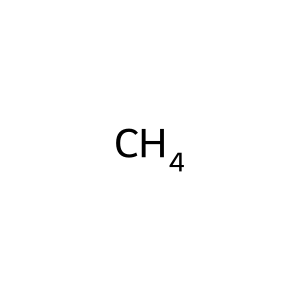

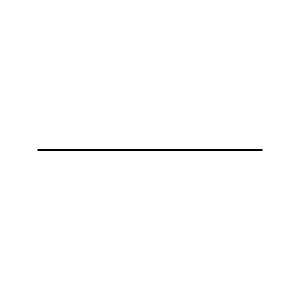

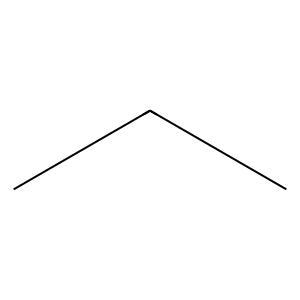

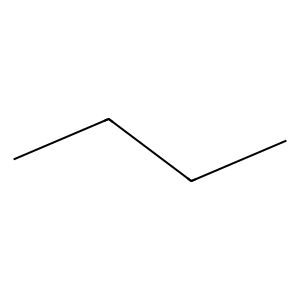

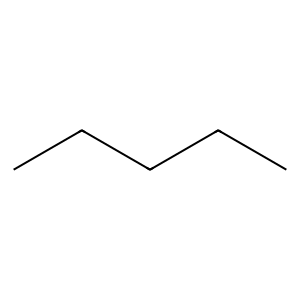

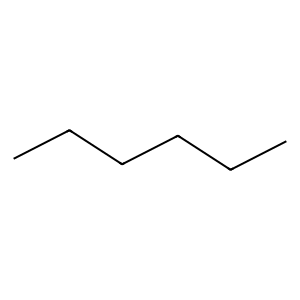

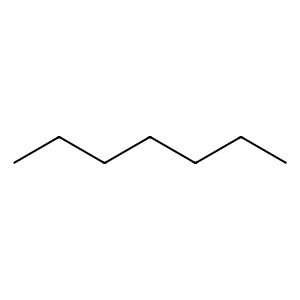

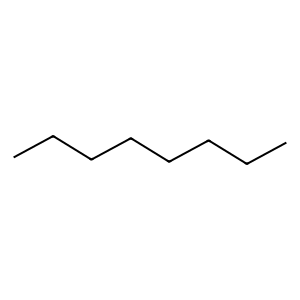

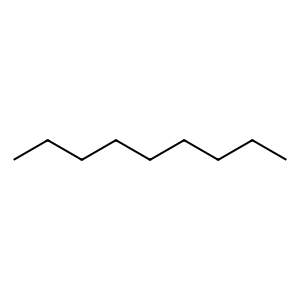

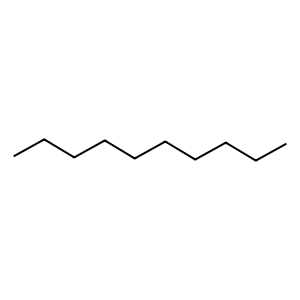

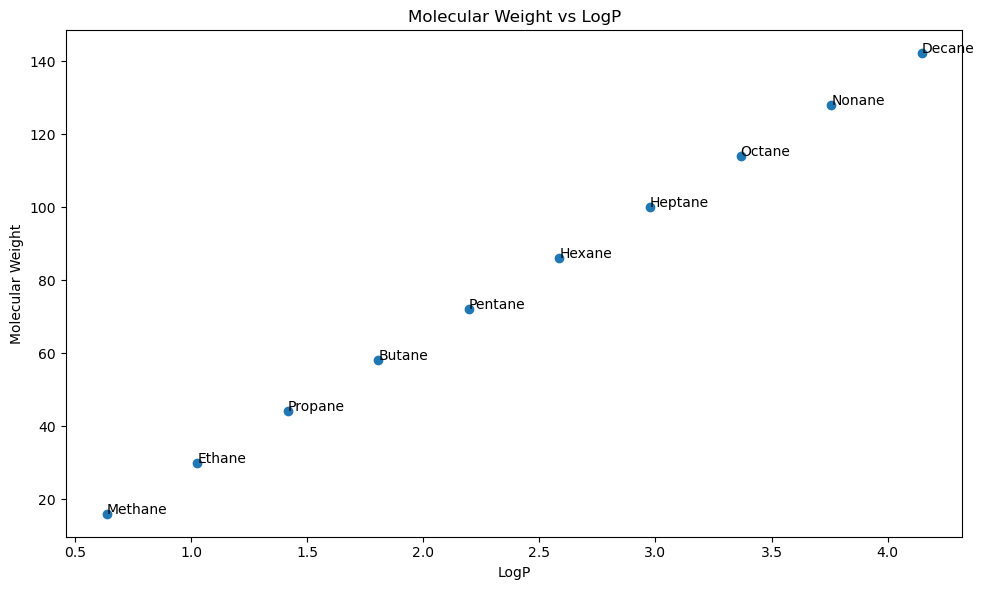


Processing complete. Check the generated files in the current directory.


In [4]:
# Read the CSV file
df_original = read_csv_file(INPUT_CSV)

print("\nOriginal Data:")
display(HTML(df_original.to_html(index=False)))

# Calculate properties for each molecule
properties = [calculate_properties(smiles) for smiles in df_original['SMILES']]

# Create a new DataFrame with the original data and calculated properties
df_rdkit = df_original.copy()
for prop in properties[0].keys():
    df_rdkit[prop] = [p[prop] for p in properties]

print("\nUpdated Data with RDKit-generated properties:")
display(HTML(df_rdkit.to_html(index=False)))

# Generate molecule images
print("\nGenerating Molecule Images:")
for _, row in df_rdkit.iterrows():
    generate_molecule_image(row['SMILES'], row['Name'])
    display(IPImage(filename=str(IMAGE_DIR / f"{row['Name']}_2D.png")))

# Save the updated DataFrame to a new CSV file
df_rdkit.to_csv(OUTPUT_CSV, index=False)

# Create and display plots
plot_molweight_vs_logp(df_rdkit)

print("\nProcessing complete. Check the generated files in the current directory.")